In [15]:
#importing libraries for numpy, plot and pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [16]:
#reading the dataset

dataset = pd.read_csv('https://raw.githubusercontent.com/Tareq-BD/ECGR-5105/main/diabetes.csv')

In [17]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
Y = dataset.iloc[:, 8].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
Y[0:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [6]:
#splitting the dataset using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [8]:
#scaling the input data using standardiztion

from sklearn.preprocessing import StandardScaler
stdScale_X = StandardScaler()
X_train = stdScale_X.fit_transform(X_train)
X_test = stdScale_X.transform(X_test)

In [9]:
#Importing logistic regression and training the classifier

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [10]:
#evaluating the classifier using the evaluation set

Y_pred = classifier.predict(X_test)

In [11]:
Y_pred[0:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [12]:
#importing metrics and reporting the accuracy, precision and recall

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7337662337662337
Precision: 0.6428571428571429
Recall: 0.5094339622641509


In [13]:
# creating confusion matrix

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[86, 15],
       [26, 27]])

Text(0.5, 427.9555555555555, 'Predicted Label')

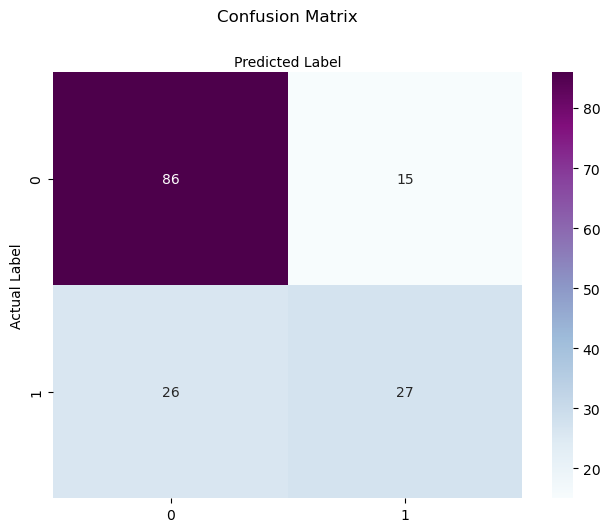

In [14]:
#plotting confusion matrix

import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')